In [1]:
import time

import matplotlib.pyplot as plt
import cv2
import numpy as np

from data.augmentation import PLAYER_LABEL, BALL_LABEL
from data import soccer_net
from image import image

from IPython import display

/Users/aleksandernagaj/.venv/FootAndBall/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
soccer_net_path = "/Users/aleksandernagaj/DTU/02456/data/soccer_net/tracking/train/"

sn = soccer_net.SoccerNet(soccer_net_path)
sn.collect(["SNMOT-061", "SNMOT-062", "SNMOT=070", "SNMOT-169", "SNMOT-170"])

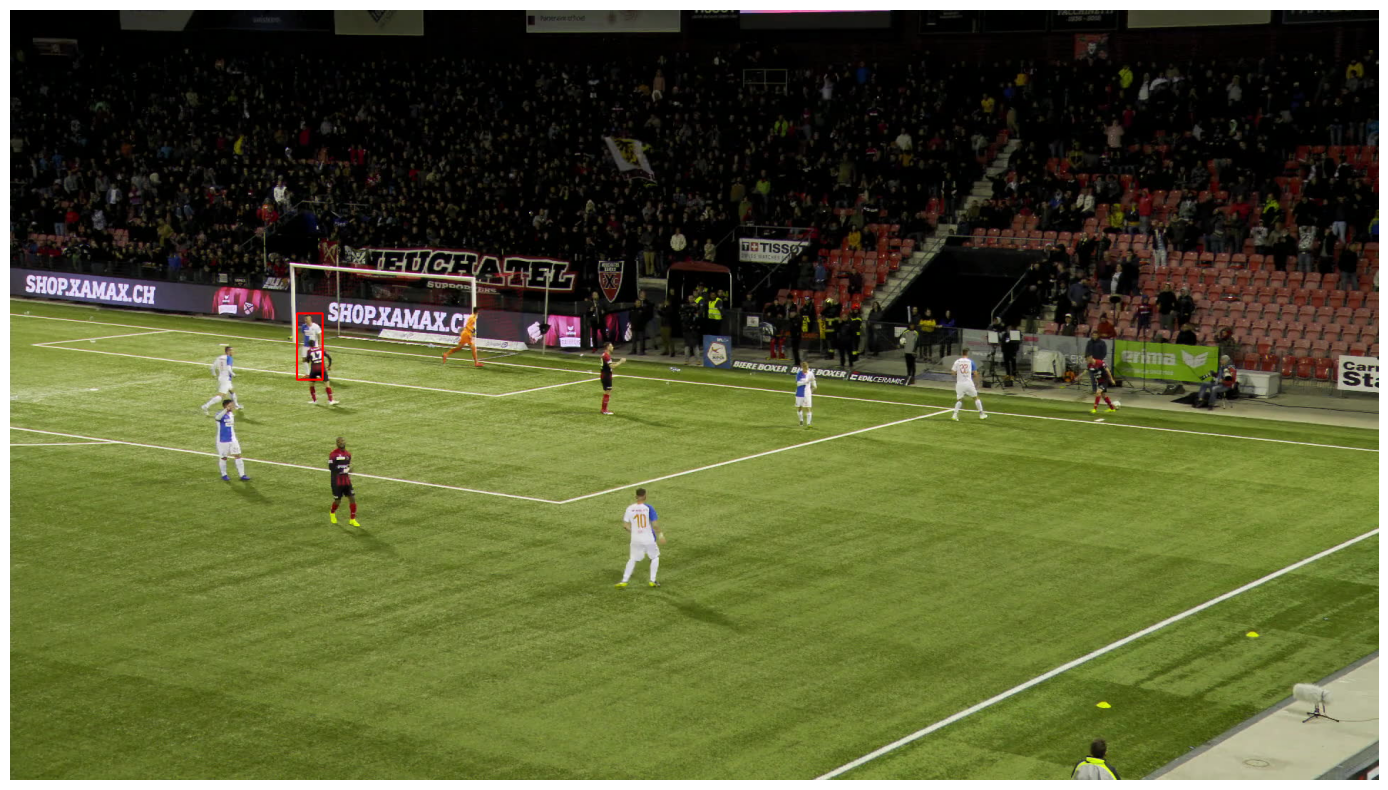

In [3]:
for img_path, ann in zip(sn.image_list, sn.gt):
    img = cv2.imread(soccer_net_path + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = image.draw_bboxes(img, np.array([ann[-2]]), image.Color.RED)

    plt.figure(figsize=(20, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    break
    

In [4]:
sizes = []
non_ball_sizes = []

for i, img_path in enumerate(sn.image_list):
    for bbox, label in zip(*sn.get_annotations(i)):
        size = abs(bbox[2]-bbox[0]) * abs(bbox[3]-bbox[1])
        if label == BALL_LABEL:
            sizes.append(size)
        else:
            non_ball_sizes.append(size)

In [5]:
print(f"Average ball size: {np.mean(sizes)}")
print(f"Ball size stdev: {np.std(sizes)}")
print(f"Max ball size: {np.max(sizes)}")
print(f"Min ball size: {np.min(sizes)}")
print()
print(f"Max player size: {np.max(non_ball_sizes)}")
print(f"Average non ball size: {np.mean(non_ball_sizes)}")
print(f"Non ball size stdev: {np.std(non_ball_sizes)}")
print(f"Max player size: {np.max(non_ball_sizes)}")
print(f"Min player size: {np.min(non_ball_sizes)}")
print()
print(f"Images with balls: {len(sizes)}")

Average ball size: 195.56848357791753
Ball size stdev: 487.493743111389
Max ball size: 19920.0
Min ball size: 48.0

Max player size: 21240.0
Average non ball size: 5072.853357618335
Non ball size stdev: 2953.8846365355257
Max player size: 21240.0
Min player size: 24.0

Images with balls: 2862


In [8]:
sn.clean()
sn.collect(["SNMOT-066", "SNMOT-098", "SNMOT-152"])

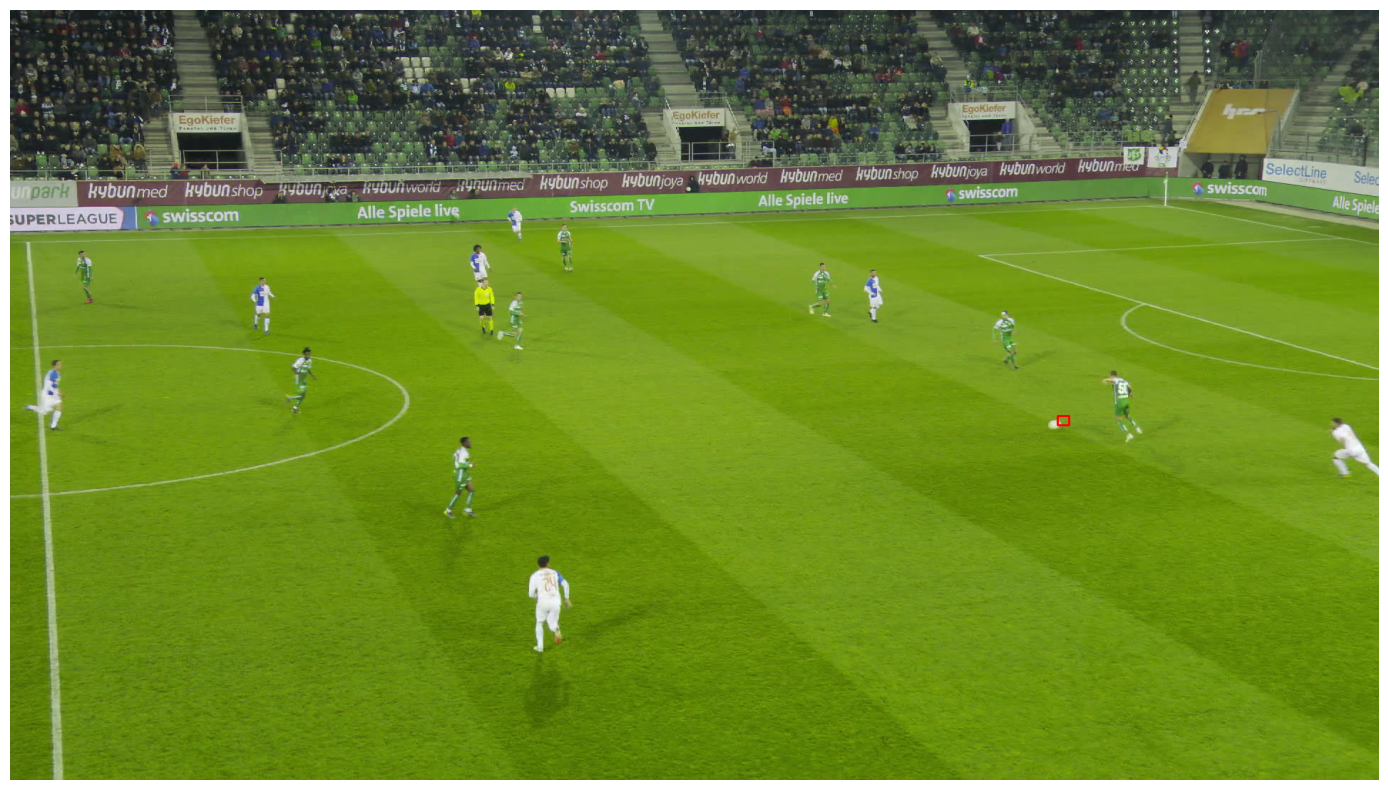

<Figure size 640x480 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

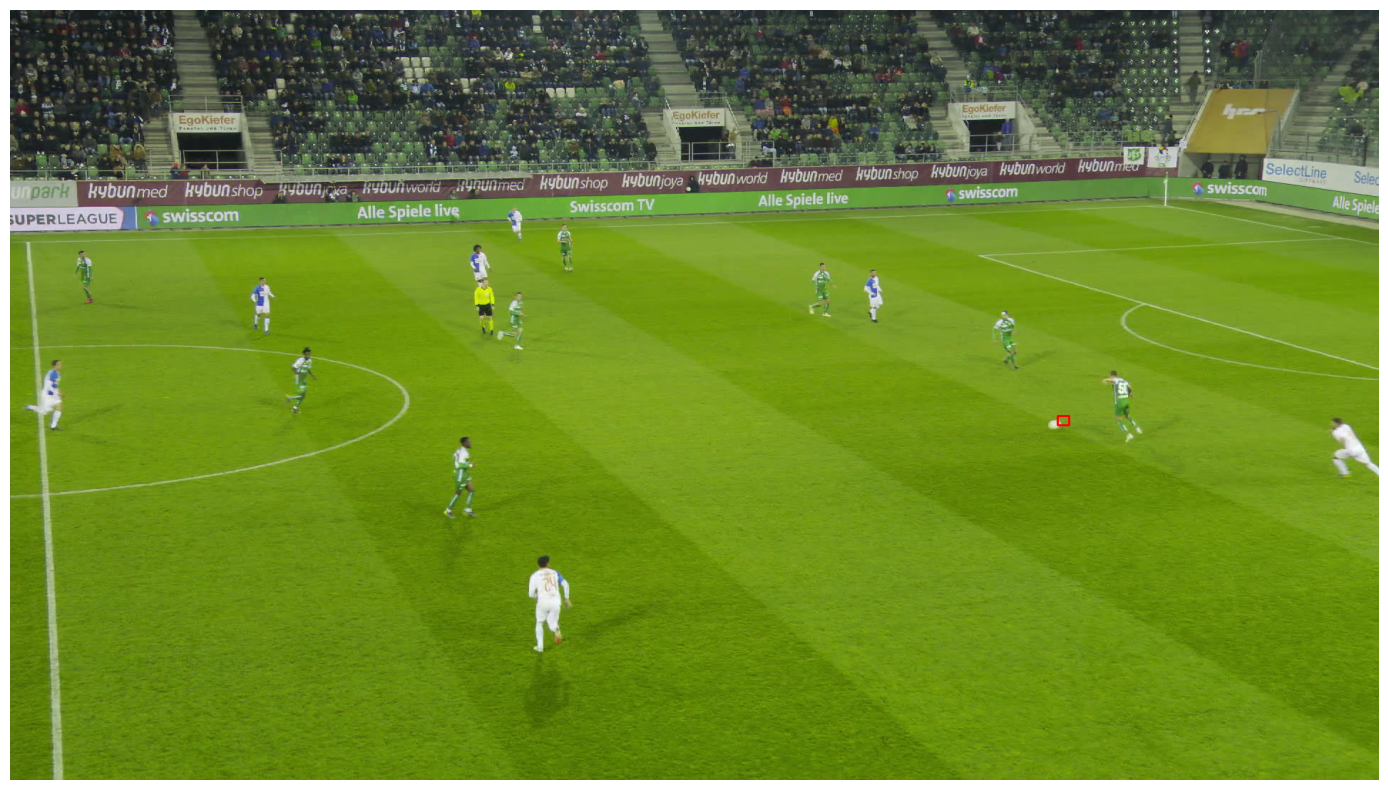

In [10]:
for i, img_path in enumerate(sn.image_list):
    for annotIdx, (bbox, label) in enumerate(zip(*sn.get_annotations(i))):
        if label == BALL_LABEL and i%66 == 0:
            img = cv2.imread(soccer_net_path + img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = image.draw_bboxes(img, np.array([bbox]), image.Color.RED)

            plt.clf()
            plt.figure(figsize=(20, 10))
            plt.imshow(img)
            plt.axis("off")
            display.clear_output(wait=True)
            display.display(plt.gcf())
            
            time.sleep(1)